In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import plotly.express as px
import plotly.graph_objects as go
from pandas.io.json import json_normalize
import re

# Get laureate data with the Nobel Prize API
res1 = requests.get("http://api.nobelprize.org/2.1/laureates?limit=1000")
json_laureate = json.loads(res1.content)

# Process data
laureate = json_normalize(json_laureate["laureates"])

# Create data of noble laureates
df_laureate = pd.concat([
    laureate["id"],
    laureate["fullName.en"],
    laureate["givenName.en"],
    laureate["familyName.en"],
    laureate["birth.date"],
    laureate["gender"],
    laureate["birth.place.cityNow.en"],
    laureate["birth.place.countryNow.en"],
    laureate["wikipedia.english"]
], axis=1)

df_laureate.columns = ["id", "full_name", "first_name", "last_name", "birth_date", "gender", "birth_city", "birth_country", "wikipedia"]

# Create data set of awards (noble prizes)
nobel_prizes = json_normalize(json_laureate["laureates"], record_path="nobelPrizes", meta="id", record_prefix="prize_")
df_prize = nobel_prizes[["id", "prize_awardYear", "prize_category.en", "prize_motivation.en"]]
df_prize.columns = ["laureate_id", "award_year", "category", "motivation"]

# Combine the two datasets
df_prize_laureate = pd.merge(df_prize, df_laureate, left_on="laureate_id", right_on="id", how="left")
df_prize_laureate["award_year"] = df_prize_laureate["award_year"].astype(int)

# Function to scrape image URLs for laureates
def get_image(url):
    print(f"Fetching image links for {url}")
    html_content = requests.get(url).content
    soup = BeautifulSoup(html_content, "html.parser")
    sources = soup.select("picture source")
    images = [source["data-srcset"] for source in sources if "portrait-mini" in source["data-srcset"]]
    image_tags = [f'<img src="{img}" width=120>' for img in images]
    return " ".join(image_tags)

# Get image links for all laureates - this part will take some time with the get_image function!
df_prize_laureate["noble_link"] = df_prize_laureate.apply(
    lambda row: f"https://www.nobelprize.org/prizes/{'economic-sciences' if row['category'] == 'Economic Sciences' else row['category'].lower()}/{row['award_year']}/summary/",
    axis=1)
df_prize_laureate["images"] = df_prize_laureate["noble_link"].apply(get_image)
df_prize_laureate["gender"].fillna("unknown", inplace=True)

/usr/local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2001/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1975/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2004/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1982/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/2021/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1979/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2019/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/2019/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2009/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/2011/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1939/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1905/summar

Fetching image links for https://www.nobelprize.org/prizes/physics/1975/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2016/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1982/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2021/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2016/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1947/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1991/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1905/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1977/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1994/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/1950/summary/
Fetching image links for https://www.no

Fetching image links for https://www.nobelprize.org/prizes/physics/2018/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/2007/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1964/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1996/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2022/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1993/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1986/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1990/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1952/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1971/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1932/summary/
Fetching image links for https://www.

Fetching image links for https://www.nobelprize.org/prizes/chemistry/1931/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1974/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1947/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1953/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1918/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1953/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1923/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/1982/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1908/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/1945/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/2000/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sci

Fetching image links for https://www.nobelprize.org/prizes/peace/1901/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1973/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1983/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1990/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/1905/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1985/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1979/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/2000/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1944/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1978/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/1946/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or med

Fetching image links for https://www.nobelprize.org/prizes/literature/1944/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2002/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2019/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1956/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1972/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1994/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1962/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/2006/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1986/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/2022/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1951/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1975/summary/
Fetch

Fetching image links for https://www.nobelprize.org/prizes/peace/1962/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1954/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/2010/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2012/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1949/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1904/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1957/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1929/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1998/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1970/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1907/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/2020/summary/
Fetc

Fetching image links for https://www.nobelprize.org/prizes/literature/2018/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2009/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2016/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/2007/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/2013/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/2006/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2008/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1987/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1950/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1944/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1936/summary/
Fetching image links for https://www.nobelprize.org

Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1986/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1981/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1923/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1998/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/2020/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1965/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1914/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1997/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1996/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1937/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1995/summary/
Fetching image links for https://www.nobelprize

Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1963/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/2007/summary/
Fetching image links for https://www.nobelprize.org/prizes/physics/1977/summary/
Fetching image links for https://www.nobelprize.org/prizes/peace/1933/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/2001/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/2019/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/2003/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1947/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1904/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1972/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1997/summary/
Fetching image 

Fetching image links for https://www.nobelprize.org/prizes/physics/1997/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2014/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1949/summary/
Fetching image links for https://www.nobelprize.org/prizes/economic-sciences/1990/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/1949/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/2019/summary/
Fetching image links for https://www.nobelprize.org/prizes/literature/1983/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1972/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/2001/summary/
Fetching image links for https://www.nobelprize.org/prizes/chemistry/1976/summary/
Fetching image links for https://www.nobelprize.org/prizes/physiology or medicine/1934/summary/
Fetching image links for https://www.nobelprize.org/p

In [2]:
def extract_link(row):
    last_name = row['last_name']
    image_str = row['images']

    if pd.isna(last_name) or last_name.lower() == 'nan':
        print(f"Missing last_name for image string '{image_str}'")
        return None

    if not image_str:
        print(f"No image string for last_name '{last_name}'")
        return None

    # Extract all image links
    pattern = r'<img src="(.*?)"'
    links = re.findall(pattern, image_str, re.IGNORECASE | re.UNICODE)

    if not links:
        print(f"No image links found for last_name '{last_name}' in image string '{image_str}'")
        return None

    # Assign the first image link
    return links[0]
df_prize_laureate["links"] = df_prize_laureate.apply(extract_link, axis=1)

In [6]:
#Count gender by categories
df_prize_laureate.groupby(['full_name','gender']).size()
df_prize_laureate['birth_year'] = df_prize_laureate['birth_date'].str.split('-').str[0]

In [7]:
df_prize_laureate['birth_year'] = df_prize_laureate['birth_year'].astype(float)

In [8]:
df_prize_laureate['winner_age'] = df_prize_laureate['award_year'] - df_prize_laureate['birth_year']

In [ ]:
df = df_prize_laureate.drop(['laureate_id', 'id','last_name', 'birth_date', 'birth_city', 'gender', 'birth_country', 'wikipedia',  'noble_link','images'], axis=1)
df.to_csv("nobel.csv")

In [28]:
#Create new dataframes for using them in Flourish Studio
more_info = df_prize_laureate[['full_name','gender','category', 'birth_year', 'winner_age', 'birth_country', 'award_year']]
more_info = more_info[more_info.gender != 'unknown']
more_info.to_csv("more_info.csv")

In [48]:
df_grouped = more_info.groupby('award_year')['gender'].value_counts().unstack(fill_value=0)
df_grouped.columns.name = None
df_grouped.reset_index(inplace=True)
df_grouped.rename(columns={'year': 'Year', 'female': 'Female', 'male': 'Male'}, inplace=True)
# print the resulting dataframe
df_grouped
#write csv
df_grouped.to_csv('grouped.csv')

In [50]:
df_grouped = more_info.groupby('award_year')['gender'].value_counts().unstack(fill_value=0)
df_grouped['Total'] = df_grouped.sum(axis=1)
df_grouped['Female %'] = df_grouped['female'] / df_grouped['Total'] * 100
df_grouped['Male %'] = df_grouped['male'] / df_grouped['Total'] * 100
df_percent = df_grouped[['Female %', 'Male %']]
df_percent

gender,Female %,Male %
award_year,,
1901,0.000000,100.000000
1902,0.000000,100.000000
1903,14.285714,85.714286
1904,0.000000,100.000000
1905,20.000000,80.000000
...,...,...
2018,30.769231,69.230769
2019,7.142857,92.857143
2020,36.363636,63.636364


In [55]:
total_count = len(more_info)
male_count = more_info['gender'].value_counts()['male']
female_count = more_info['gender'].value_counts()['female']
total_male_female_count = male_count + female_count

male_percent = male_count / total_count * 100
female_percent = female_count / total_count * 100

print("Total Male: {}".format(male_count))
print("Total Female: {}".format(female_count))
print("Total Male and Female: {}".format(total_male_female_count))
print("Male: {:.2f}%".format(male_percent))
print("Female: {:.2f}%".format(female_percent))


Total Male: 898
Total Female: 61
Total Male and Female: 959
Male: 93.64%
Female: 6.36%


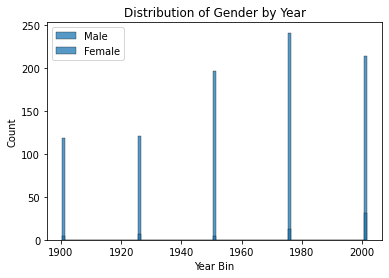

In [76]:
import seaborn as sns

# create bins with 25-year intervals
bins = range(int(more_info['award_year'].min()), int(more_info['award_year'].max())+26, 25)

# create a new column with the bin labels
more_info['year_bin'] = pd.cut(more_info['award_year'], bins=bins, labels=bins[:-1])

# filter the data by gender
male_data = more_info[more_info['gender'] == 'male']
female_data = more_info[more_info['gender'] == 'female']

# create the histogram for each gender
sns.histplot(male_data, x='year_bin', bins=bins, label='Male')
sns.histplot(female_data, x='year_bin', bins=bins, label='Female')

# set the plot title and labels
plt.title('Distribution of Gender by Year')
plt.xlabel('Year Bin')
plt.ylabel('Count')

# show the legend
plt.legend()

# show the plot
plt.show()

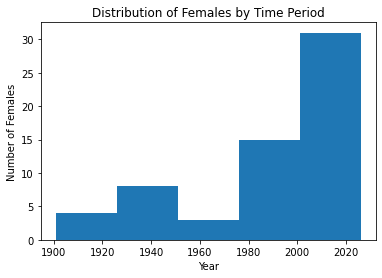

In [61]:
import matplotlib.pyplot as plt

# Create bins of 25 years each
bins = range(int(more_info['award_year'].min()), int(more_info['award_year'].max()) + 26, 25)

# Plot the histogram
plt.hist(more_info[more_info['gender'] == 'female']['award_year'], bins=bins)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Females')
plt.title('Distribution of Females by Time Period')
plt.show()


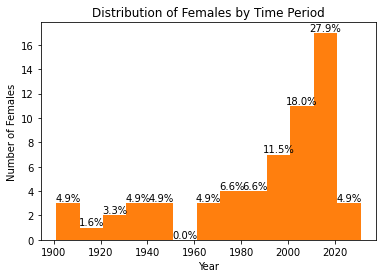

In [75]:
import matplotlib.pyplot as plt

# Create bins of 25 years each
bins = range(int(more_info['award_year'].min()), int(more_info['award_year'].max()) + 11, 10)

# Plot the histogram
plt.hist(more_info[more_info['gender'] == 'female']['award_year'], bins=bins)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Females')
plt.title('Distribution of Females by Time Period')

# Add percentage labels on top of bars
n, bins, patches = plt.hist(more_info[more_info['gender'] == 'female']['award_year'], bins=bins)
for i, patch in enumerate(patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    percent = y / n.sum() * 100
    plt.text(x, y, '{:.1f}%'.format(percent), ha='center', va='bottom')

plt.show()

In [86]:
# Calculate total number of females
total_females = len(more_info[more_info['gender'] == 'female'])

# Group data by decade
more_info['decade'] = more_info['award_year'] // 10 * 10
df_decade = more_info.groupby('decade')['gender'].value_counts().unstack(fill_value=0)

# Calculate percentage of females in each decade from total number of females
df_decade['Total'] = df_decade.sum(axis=1)
df_decade['Female %'] = df_decade['female'] / total_females * 100

# Select only the columns we need
df_decade_percent = df_decade[['Female %']]

# Rename the columns and reset the index
df_decade_percent.columns.name = None
df_decade_percent.reset_index(inplace=True)
df_decade_percent.rename(columns={'decade': 'Decade'}, inplace=True)

# Print the result
print(df_decade_percent)

    Decade   Female %
0     1900   4.918033
1     1910   1.639344
2     1920   3.278689
3     1930   4.918033
4     1940   4.918033
5     1950   0.000000
6     1960   4.918033
7     1970   6.557377
8     1980   6.557377
9     1990  11.475410
10    2000  18.032787
11    2010  21.311475
12    2020  11.475410


/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [87]:
df_decade_percent.to_csv("df_decade_percent.csv")